In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [2]:
data = pd.read_csv("Stock_price.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-18,27.222500,27.237499,26.735001,26.870001,24.992023,243286000
1,2016-04-19,26.969999,27.000000,26.557501,26.727501,24.859484,129539600
2,2016-04-20,26.660000,27.022499,26.514999,26.782499,24.910643,122444000
3,2016-04-21,26.732500,26.732500,26.379999,26.492500,24.640911,126210000
4,2016-04-22,26.252501,26.620001,26.155001,26.420000,24.573479,134732400


In [3]:
df=data.reset_index()['Adj Close']
df

0        24.992023
1        24.859484
2        24.910643
3        24.640911
4        24.573479
           ...    
1254    131.240005
1255    134.429993
1256    132.029999
1257    134.500000
1258    134.160004
Name: Adj Close, Length: 1259, dtype: float64

In [4]:
df.dropna(inplace=True)

In [5]:
df.head(5)

0    24.992023
1    24.859484
2    24.910643
3    24.640911
4    24.573479
Name: Adj Close, dtype: float64

In [6]:
scaler=MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform((np.array(df).reshape(-1,1)))

In [7]:
df

array([[0.03166864],
       [0.03058058],
       [0.03100056],
       ...,
       [0.91038323],
       [0.93066039],
       [0.92786924]])

In [8]:
size = int(len(df)*0.8)
train, test = df[:size], df[size:]
train.shape, test.shape

((1007, 1), (252, 1))

In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [10]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 30
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

In [11]:
X_train.shape, y_train.shape

((976, 30), (976,))

In [12]:
X_test.shape, y_test.shape

((221, 30), (221,))

In [13]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [14]:
### Create the Stacked LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 30, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 7s 78ms/step - loss: 0.0123 - val_loss: 0.1118
Epoch 2/100
16/16 [==============================] - 0s 18ms/step - loss: 0.0016 - val_loss: 0.0059
Epoch 3/100
16/16 [==============================] - 0s 19ms/step - loss: 7.1513e-04 - val_loss: 0.0040
Epoch 4/100
16/16 [==============================] - 0s 19ms/step - loss: 5.0958e-04 - val_loss: 0.0066
Epoch 5/100
16/16 [==============================] - 0s 17ms/step - loss: 4.9115e-04 - val_loss: 0.0062
Epoch 6/100
16/16 [==============================] - 0s 19ms/step - loss: 4.4274e-04 - val_loss: 0.0078
Epoch 7/100
16/16 [==============================] - 0s 17ms/step - loss: 4.3059e-04 - val_loss: 0.0056
Epoch 8/100
16/16 [==============================] - 0s 17ms/step - loss: 4.5019e-04 - val_loss: 0.0085
Epoch 9/100
16/16 [==============================] - 0s 19ms/step - loss: 3.9129e-04 - val_loss: 0.0063
Epoch 10/100
16/16 [==============================] - 0s 18ms/step - los

16/16 [==============================] - 0s 20ms/step - loss: 1.4068e-04 - val_loss: 0.0077
Epoch 80/100
16/16 [==============================] - 0s 19ms/step - loss: 1.4204e-04 - val_loss: 0.0069
Epoch 81/100
16/16 [==============================] - 0s 20ms/step - loss: 1.3334e-04 - val_loss: 0.0090
Epoch 82/100
16/16 [==============================] - 0s 21ms/step - loss: 1.4112e-04 - val_loss: 0.0110
Epoch 83/100
16/16 [==============================] - 0s 20ms/step - loss: 1.2853e-04 - val_loss: 0.0120
Epoch 84/100
16/16 [==============================] - 0s 19ms/step - loss: 1.3709e-04 - val_loss: 0.0095
Epoch 85/100
16/16 [==============================] - 0s 19ms/step - loss: 1.1779e-04 - val_loss: 0.0046
Epoch 86/100
16/16 [==============================] - 0s 20ms/step - loss: 1.3176e-04 - val_loss: 0.0063
Epoch 87/100
16/16 [==============================] - 0s 19ms/step - loss: 1.4378e-04 - val_loss: 0.0078
Epoch 88/100
16/16 [==============================] - 0s 19ms/step -

In [17]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [18]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [19]:
math.sqrt(mean_squared_error(y_train,train_predict))

44.93293500936823

In [20]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

107.77731539735802

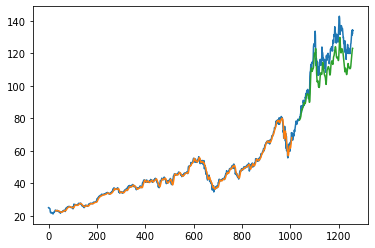

In [21]:
### Plotting 
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [45]:
x_input=test[len(test)-look_back:].reshape(1,-1)
x_input.shape

(1, 30)

In [46]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [47]:
# demonstrate prediction for next 10 days
lst_output=[]
n_steps=time_step
i=0
while(i<10):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.84121144]
31
1 day input [0.78174239 0.82057268 0.81146033 0.82771485 0.82008014 0.84437987
 0.8573507  0.85070112 0.81597545 0.81154238 0.83945426 0.83247631
 0.8123633  0.81646799 0.82155782 0.82303551 0.81080357 0.82927466
 0.83625261 0.86005981 0.86260469 0.87647855 0.8966736  0.91834633
 0.90389788 0.93008568 0.91038323 0.93066039 0.92786924 0.84121144]
1 day output [[0.8172025]]
2 day input [0.82057268 0.81146033 0.82771485 0.82008014 0.84437987 0.8573507
 0.85070112 0.81597545 0.81154238 0.83945426 0.83247631 0.8123633
 0.81646799 0.82155782 0.82303551 0.81080357 0.82927466 0.83625261
 0.86005981 0.86260469 0.87647855 0.8966736  0.91834633 0.90389788
 0.93008568 0.91038323 0.93066039 0.92786924 0.84121144 0.81720251]
2 day output [[0.7796254]]
3 day input [0.81146033 0.82771485 0.82008014 0.84437987 0.8573507  0.85070112
 0.81597545 0.81154238 0.83945426 0.83247631 0.8123633  0.81646799
 0.82155782 0.82303551 0.81080357 0.82927466 0.83625261 0.86005981
 0.86260469 0.87647855 

In [48]:
day_new=np.arange(1,31)
day_pred=np.arange(31,41)

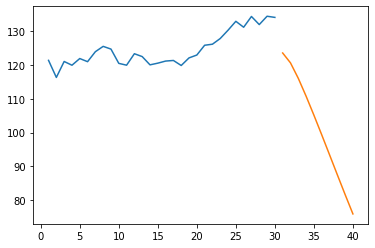

In [54]:
plt.plot(day_new,scaler.inverse_transform(df[len(df)-look_back:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))